In [1]:
import pandas as pd
import numpy as np
import pickle

In [2]:
df_train=pd.read_csv('train_final.csv', index_col=False)
labels=df_train[['784']]

In [3]:
df_train.drop(df_train.columns[[784]],axis=1,inplace=True)
df_train.head()

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,255,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,255,255,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
np.random.seed(1212)
import keras
from keras.models import Model
from keras.layers import *
from keras import optimizers
from keras.layers import Input, Dense
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils
from keras import backend as K
try:
    if K.backend() == 'theano':
        K.set_image_data_format('channels_first')
    else:
        K.set_image_data_format('channels_last')
except AttributeError:
    if K._BACKEND == 'theano':
        K.set_image_dim_ordering('th')
    else:
        K.set_image_dim_ordering('tf') 

In [5]:
labels=np.array(labels)

In [6]:
from keras.utils.np_utils import to_categorical
Y=to_categorical(labels,num_classes=9)
Y.shape

(90, 9)

In [7]:
df_train.head()

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,255,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,255,255,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
l=[]
for i in range(len(labels)):
    l.append(np.array(df_train[i:i+1]).reshape(28,28,1))
X=np.array(l)
X.shape

(90, 28, 28, 1)

In [9]:
from sklearn.model_selection import train_test_split 
from keras.utils.vis_utils import plot_model
X_train,X_test,y_train,y_test= train_test_split(X,Y, test_size=0.25, random_state=7)

In [17]:
model = Sequential()
model.add(Conv2D(72, (5, 5), input_shape=(28, 28,1), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(36, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))
model.add(Flatten())
# model.add(Dense(128, activation='relu'))
model.add(Dense(81, activation='relu'))
model.add(Dense(9, activation='softmax'))
# Compile model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())
# plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 24, 24, 72)        1872      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 12, 12, 72)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 10, 10, 36)        23364     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 5, 5, 36)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 5, 5, 36)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 900)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 81)               

In [19]:
from keras.models import model_from_json

In [20]:
history=model.fit(X_train, y_train, epochs=10, batch_size=5,shuffle=True,verbose=1)

Epoch 1/10
14/14 [==============================] - 0s 6ms/step - loss: 25.7263 - accuracy: 0.1343
Epoch 2/10
14/14 [==============================] - 0s 6ms/step - loss: 4.6483 - accuracy: 0.3881
Epoch 3/10
14/14 [==============================] - 0s 6ms/step - loss: 1.5443 - accuracy: 0.6269
Epoch 4/10
14/14 [==============================] - 0s 6ms/step - loss: 0.7580 - accuracy: 0.7612
Epoch 5/10
14/14 [==============================] - 0s 6ms/step - loss: 0.5468 - accuracy: 0.8358
Epoch 6/10
14/14 [==============================] - 0s 5ms/step - loss: 0.3308 - accuracy: 0.8806
Epoch 7/10
14/14 [==============================] - 0s 6ms/step - loss: 0.1280 - accuracy: 0.9403
Epoch 8/10
14/14 [==============================] - 0s 6ms/step - loss: 0.1058 - accuracy: 0.9701
Epoch 9/10
14/14 [==============================] - 0s 6ms/step - loss: 0.1159 - accuracy: 0.9552
Epoch 10/10
14/14 [==============================] - 0s 6ms/step - loss: 0.0969 - accuracy: 0.9552


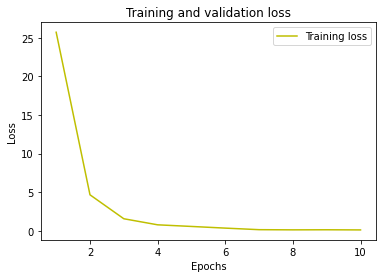

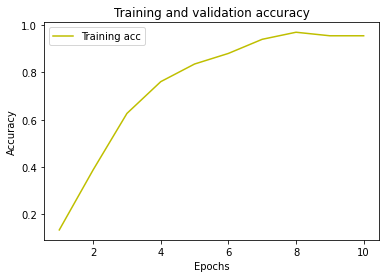

In [21]:
from matplotlib import pyplot as plt

loss = history.history['loss']
# val_loss = history.history['val_loss']
epochs = range(1,len(loss)+1)
plt.plot(epochs, loss, 'y', label='Training loss')
# plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

acc = history.history['accuracy']
# val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
# plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [22]:
model_json = model.to_json()
with open("model_final.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("model_final.h5")